In [6]:
import pandas
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [7]:
df = pandas.read_excel('Solvents.xls')
Names = df['Solvent'].values
D = df['δD'].values
P = df['δP'].values
H = df['δH'].values
# The values for aMVL are in the first row. We'll subtract those to center the data around aMVL.
[Names[0], D[0], P[0], H[0]]

['aMVL', 17.4, 9.8, 7.4]

In [8]:
# Calculate the Hansen Solubility
Ra = np.sqrt(4*(D-D[0])**2+(P-P[0])**2+(H-H[0])**2)

In [52]:
def addtitle(linenum, xshift, yshift):
    x2, y2, _ = proj3d.proj_transform(D[linenum],P[linenum],H[linenum], ax.get_proj())

    label = pylab.annotate(
        Names[linenum], 
        xy = (x2, y2), xytext = (xshift,yshift),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

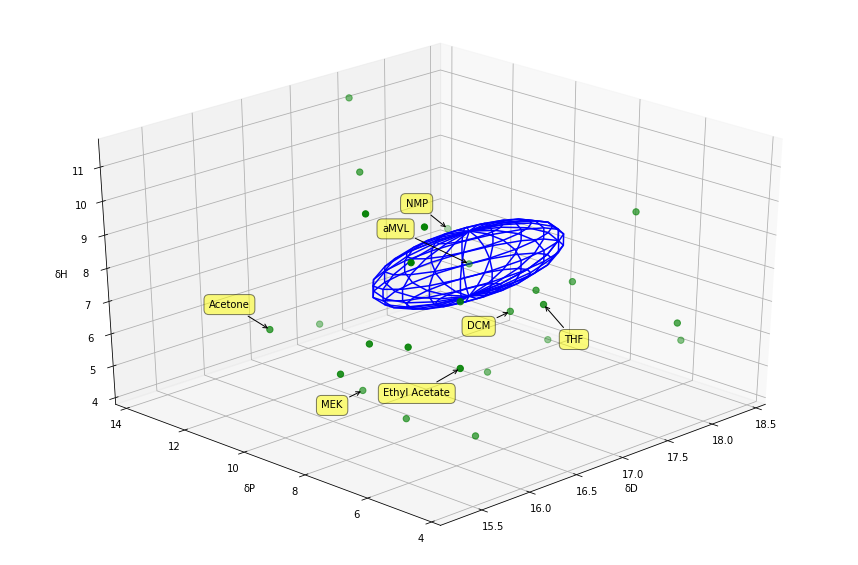

In [63]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 225)

# Add axes labels.
ax.set_xlabel('δD')
ax.set_ylabel('δP')
ax.set_zlabel('δH')
markersize = 40

ax.scatter(D,P,H, s=markersize, c='g', marker='o')

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = D[0]+np.cos(u)*np.sin(v)
y = P[0]+np.sin(u)*np.sin(v)
z = H[0]+np.cos(v)
ax.plot_wireframe(x, y, z, color="b")

# Add titles for the desired chemicals.
#for i in range(0, 25):
#    addtitle(i)
addtitle(0, -60, 30)
addtitle(1, -20, -20)
addtitle(3, -20, 20)
addtitle(13, 40, -40)
addtitle(25, -10, -30)
addtitle(10, -20, 20)
addtitle(9, -20, -20)

plt.show()